比賽簡介：如同鐵達尼號生存預測，透過機器學習猜測同名的太空船上乘客是否會在太空旅行中被空間裂縫傳送走。

為什麼選擇這個比賽：這個比賽和我們學過的鐵達尼號類似，可以測試自己在課程上的所學的概念以及更了解自己所使用的程式碼。

資料集和目標介紹:

PassengerId- 每位乘客都有一個獨特的 ID。每個 ID 均採用以下形式gggg_pp，其中gggg指示乘客隨行的團體，並且pp是他們在團體中的編號。群體中的人通常是家庭成員，但並非總是如此。

HomePlanet- 乘客離開的星球，通常是他們永久居住的星球。

CryoSleep- 表示乘客是否選擇在航程期間處於假死狀態。處於冷凍睡眠狀態的乘客被限制在自己的客艙內。

Cabin- 乘客所居住的艙室號碼。採用以下形式deck/num/side，其中可以side是P左舷或S右舷。

Destination- 乘客將要登陸的星球。

Age- 乘客的年齡。

VIP- 旅客是否在航程中支付了特殊VIP服務費用。

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- 乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用。

Name- 乘客的名字和姓氏。

Transported- 乘客是否被傳送到另一個維度。這是目標，即您嘗試預測的列。

In [62]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import dataset
df = pd.read_csv("train.csv")
#df.head(n=10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


從info可以發現每項都有缺值，需要填補才能分析

In [63]:
#先排除PassengerId和Name，儘管有沒有同行者可能影響，但分類困難
#問題:能否分離ID建立新欄為"同行者數量"或"有無同行者"
df.drop(['PassengerId','Name'],axis = 1,inplace = True)
#艙位Cabin也難以分別
#問題:能否分離三個值以供分析
df.drop(['Cabin'],axis = 1,inplace = True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [64]:
#大部分資料都為object，應先數值化，才方便圖像化資料分辨關系度
df=pd.get_dummies(data=df, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP','Transported'])
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Transported_False,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0,0,1


In [65]:
#CryoSleep、VIP、Transported可只用true表示
df.drop(['CryoSleep_False','VIP_False','Transported_False'],axis = 1,inplace = True)
#HomePlanet和Destination皆有三種，可由另二求三
df.drop(['HomePlanet_Mars','Destination_TRAPPIST-1e'],axis = 1,inplace = True)
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,0,1


In [66]:
#處理缺值:採用前向填充
df.fillna(method='ffill', inplace=True)

In [67]:
#圖像化預先分析(暫時跳過)

In [68]:
#開始建立資料集
X=df.drop(['Transported_True'],axis=1)
y=df['Transported_True']
#split to training data&testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=87)
#using Logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [69]:
#Evaluate 多種分類法比較
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))

0.7752472969864275
0.758820902188477
0.7954119850187266


結果還不錯直接採用

In [70]:
#model import
import joblib
joblib.dump(lr,'Spaceship Titanic-LR-20231113.pkl',compress=3)
#Model Using
model_pretrained=joblib.load('Spaceship Titanic-LR-20231113.pkl')
import pandas as pd
#for submission
df_test=pd.read_csv("test.csv")
ID=df_test['PassengerId']
df_test.drop(['PassengerId','Name','Cabin'],axis = 1,inplace = True)
df_test=pd.get_dummies(data=df_test, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test.drop(['CryoSleep_False','VIP_False'],axis = 1,inplace = True)
df_test.drop(['HomePlanet_Mars','Destination_TRAPPIST-1e'],axis = 1,inplace = True)
df_test.info()
df_test.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4186 non-null   float64
 1   RoomService                4195 non-null   float64
 2   FoodCourt                  4171 non-null   float64
 3   ShoppingMall               4179 non-null   float64
 4   Spa                        4176 non-null   float64
 5   VRDeck                     4197 non-null   float64
 6   HomePlanet_Earth           4277 non-null   int64  
 7   HomePlanet_Europa          4277 non-null   int64  
 8   CryoSleep_True             4277 non-null   int64  
 9   Destination_55 Cancri e    4277 non-null   int64  
 10  Destination_PSO J318.5-22  4277 non-null   int64  
 11  VIP_True                   4277 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 401.1 KB


In [71]:
#生成預測
predictions2=model_pretrained.predict(df_test)
predictions2
#Prearesubmitfile建立答案卷
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId']=ID
predict = pd.DataFrame(predictions2)
replacement_map = {0: 'False', 1: 'True'}
predict.replace(replacement_map, inplace=True)
forSubmissionDF['Transported']=predict
forSubmissionDF
forSubmissionDF.to_csv('for_submission_20231114_6.csv', index=False)

如何實作：如以下程式碼

和上課的關聯性：和鐵達尼一樣都需要進行資料補足，增加了不準確性。還有數值化。

延伸學習：過程中幾段程式碼不會寫，學到了前向填充以及替換地圖的語法

結果(size=0.3,random=87)

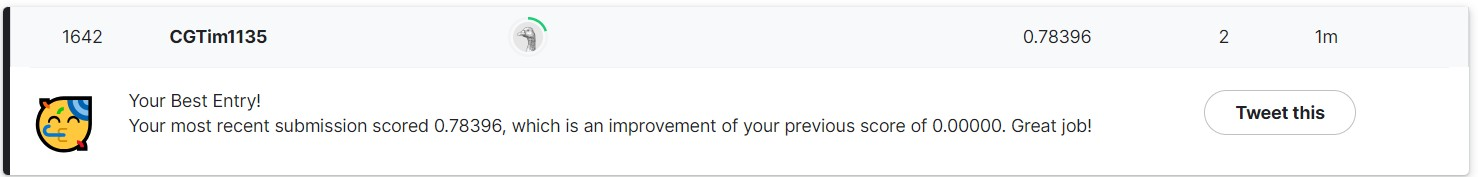

推測有哪些地方可以改善：1.可能乘客ID耶能加入分析，可以代表有沒有同行的人2.艙位也可以加入分析，不過要先把三種資料拆開。3.如果多花時間圖像化，或許能看出來那些資料無關。



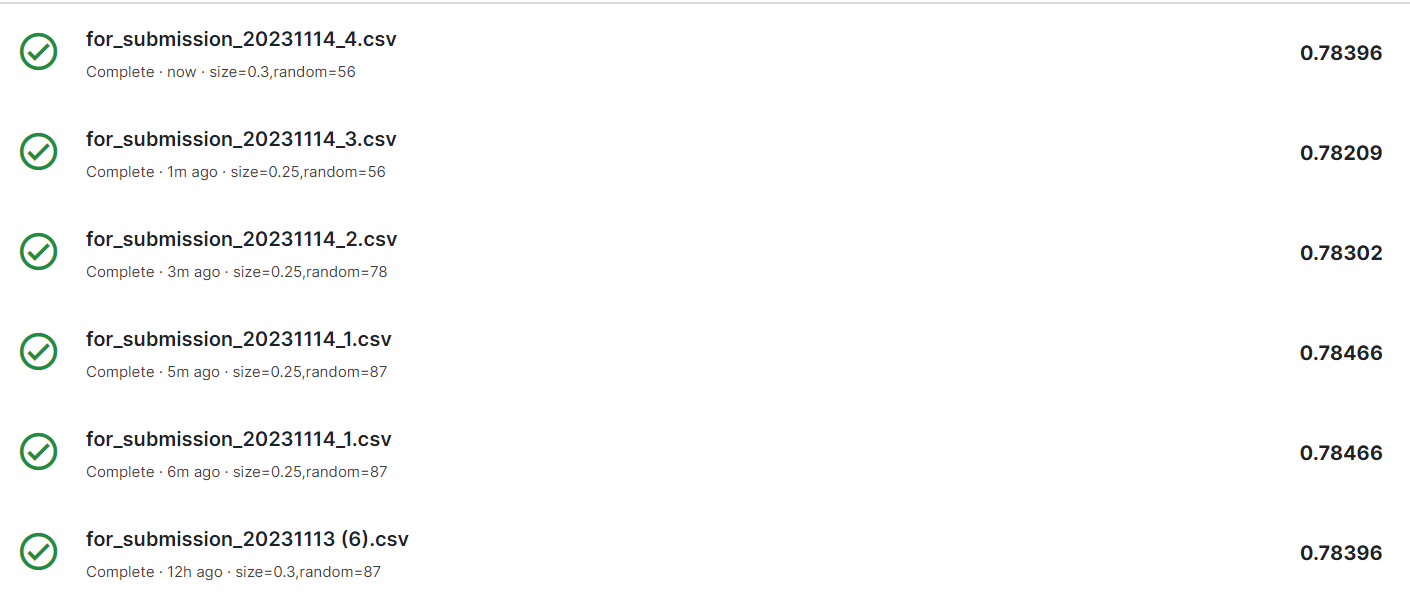

結果分析：感覺都在78%中遊蕩，應該只能透過調整資料提升準確度了。